<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Indian_Education_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving Indian Education System

In the project we made an attempt to evaluate the education system of India and categorize states based on parameters of evaluation.  

India is a huge country with numerous states so diffent states will have different issues. So a common solution cannot solve all the problems here so categorizing states and looking at the problems of each category separately can bring huge improvement in the education system.

We will use clustering approach to categorize/cluster states based on 7 parameters :

1. **Percentage of Schools with Drinking Water Facility**

2. **Gross Enrolment Ratio**

3. **Drop-out rate**

4. **Percentage of Schools with Computers**

5. **Percentage of Schools with Electricity**

6. **Schools with Boys Toilet**

7. **Schools with Girls Toilet**

The dataset is collected from https://www.kaggle.com/vidyapb/indian-school-education-statistics.

The dataset for each of the above parameters contained data for every state of India for 3 years 2013-14 to 2015-16. We took the latest data (2015-16) for our analysis. If there is missing values for some state then we take the values from previous year for that state 2014-15 or 2013-14 if even that is not available. If all the values are missing for that particular state then we impute it with mean value of all states for that particular parameter/column. So in this way after selecting recent data and imputing missing values we come up with a new csv file d_c__.csv which we will use for clustering.

In [ ]:
# Load and view the data
import pandas as pd
df=pd.read_csv('d_c__.csv')
df.head()

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet
0,A & N Islands,7.191667,83.746667,50.113636,60.893636,63.636364,63.636364,63.636364
1,Andhra Pradesh,9.850000,75.552500,58.854545,95.706364,97.686364,99.777273,99.913636
2,Arunachal Pradesh,13.250000,102.067500,50.401818,69.061818,84.240000,88.652727,89.777273
3,Assam,15.022500,79.004167,40.657273,63.560000,92.052727,82.017273,85.845455
4,Bihar,9.891869,82.744167,26.106364,52.833636,97.268182,92.170000,93.288182


In [ ]:
dfc=df.copy()

In [ ]:
# See summary statistic of all features
df.describe()

,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,8.461537,87.501481,56.649040,77.322273,88.613005,88.845126,89.198207
std,3.269587,11.140282,18.652291,17.031949,13.028974,12.647153,12.505814
min,3.617500,65.176667,20.286364,44.529091,51.056364,53.592727,54.163636
25%,6.208958,78.875625,45.362273,65.954545,85.073182,84.114545,86.952727
50%,8.132467,85.703750,55.176818,77.490000,90.909091,90.909091,90.909091
75%,10.215833,94.624792,71.116818,90.909091,98.686818,99.052955,99.140909
max,19.156667,111.035000,97.350000,99.960909,99.986364,99.927273,99.974545


We can see that we have data for 36 States and Union Territories of India. The range of mean_dropout feature is from 3.7-19.5 whereas others are above 40-100( enrollment_ratio even crosses 100). Also the mean values of some of them significantly differs from others. This different range of data among features may bias the result in case of clustering algorithms where we will use Euclidean Distance to calculate distance between points. So we will first normalize them all between 0 and 1 using MinMaxScaling().

We can see that we have data for 36 States and Union Territories of India. The range of mean_dropout feature is from 3.7-19.5 whereas others are above 40-100( enrollment_ratio even crosses 100). Also the mean values of some of them significantly differs from others. This different range of data among features may bias the result in case of clustering algorithms where we will use Euclidean Distance to calculate distance between points. So we will first normalize them all between 0 and 1 using MinMaxScaling().

In [ ]:
# Normalization of features
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
model=mx.fit(df.drop('State_UT',axis=1))
df[['mean_dropout','enrollment_ratio','comp','electricity','water','boys_toilet','female_toilet']]=model.transform(df.drop('State_UT',axis=1))

We don't know the number of clusters beforehand. We will determine it in case of KMeans Clustering algorithm using Elbow Method. This is called Elbow Method because we will choose the cluster at that point of the graph from where it stops falling sleeply(just like an elbow of hand). It is the point where the WCSS(Within Cluster Sum of Squares) decreases very slowly. 

WCSS is the distance between points in a cluster.

[16.6672178030323, 9.626212362618736, 6.484020728239903, 5.632412625841087, 4.537588419108999, 4.0515863676978565, 3.4815726314543944, 3.2029808337005674, 2.765789281387371]


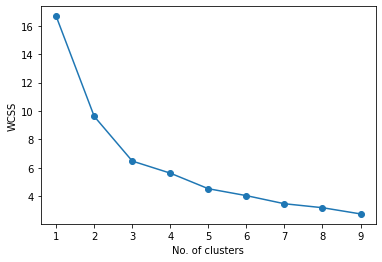

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,10):
  kmeans=KMeans(i,random_state=3)
  kmeans.fit(df.drop('State_UT',axis=1))
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
print(wcss)

From WCSS values and the Scree Plot we can see that 2 or 3 can be the ideal number of clusters.

We will use some metric to choose the ideal number of clusters between 2 and 3

We can use suitable metrics to decide exact number of cluster between 2 and 3. The metrics we will use are:

1. Silhoutte Score- It ranges from -1 to 1. Higher the value better our clusters are. Closer to 1 means perfect clusters. 0 mean the point lies at the border of it's cluster. Negative value means that the point is classified into wrong cluster.

2. Calinski-Harabasz Index denotes how the data points are spread within a cluster. Higher the score, denser is the cluster thus the cluster is better. It starts from 0 and have no upper limit.

3. Davies Boulden Index measures the average similarity between cluster using the ratio of the distance between a cluster and it's closest point & the average distance between each data point of a cluster and it's cluster center.Closer the score is to 0, better our clusters are as it indicates clusters are well separated.

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
# Though we saw that the ideal number of cluster would be either 2 or 3 we try here with 2,3,4,5 just for the sake of demonstration.
l1=[]
l2=[]
l3=[]
l4=[]
for i in (2,3,4,5):
  kmean=KMeans(i,random_state=42)
  mod_k=kmean.fit(df.drop('State_UT',axis=1))
  pred_k1=mod_k.predict(df.drop('State_UT',axis=1))
  kmean_sil=silhouette_score(df.drop('State_UT',axis=1),pred_k1,metric='euclidean')
  kmean_cal=calinski_harabasz_score(df.drop('State_UT',axis=1),pred_k1)
  kmean_dav=davies_bouldin_score(df.drop('State_UT',axis=1),pred_k1)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

2 	 Silhouette Score: 0.44848847962652155 ,Calinski Harbasz Score:  24.86899062228208 ,Davies Bouldin Score:  0.8196597416722676
3 	 Silhouette Score: 0.3224217125003294 ,Calinski Harbasz Score:  25.913358204159323 ,Davies Bouldin Score:  1.0800582378680623
4 	 Silhouette Score: 0.2547587301889692 ,Calinski Harbasz Score:  21.015950228379214 ,Davies Bouldin Score:  1.2405419803124333
5 	 Silhouette Score: 0.27697099863547936 ,Calinski Harbasz Score:  20.716869632672488 ,Davies Bouldin Score:  1.0964139165980906


In [ ]:
pd.DataFrame({'Cluster':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,2,0.448488,24.868991,0.819660
1,3,0.322422,25.913358,1.080058
2,4,0.254759,21.015950,1.240542
3,5,0.276971,20.716870,1.096414


As expected from screeplot, 2 has best SilHouette Score and Davies Bouldin Score and second best Calinski Harabasz Score. So 2 number of cluster can be an ideal choice.

In [ ]:
# Let's try performing KMeans Clustering on unnormalized data and check what's happening
l1=[]
l2=[]
l3=[]
l4=[]
for i in (2,3,4,5):
  kmean=KMeans(i,random_state=42)
  mod_k=kmean.fit(dfc.drop('State_UT',axis=1))
  pred_k2=mod_k.predict(dfc.drop('State_UT',axis=1))
  kmean_sil=silhouette_score(dfc.drop('State_UT',axis=1),pred_k2,metric='euclidean')
  kmean_cal=calinski_harabasz_score(dfc.drop('State_UT',axis=1),pred_k2)
  kmean_dav=davies_bouldin_score(dfc.drop('State_UT',axis=1),pred_k2)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

2 	 Silhouette Score: 0.36326732292471725 ,Calinski Harbasz Score:  26.836000086986264 ,Davies Bouldin Score:  1.0167048362013165
3 	 Silhouette Score: 0.39380375500268033 ,Calinski Harbasz Score:  32.31219189338498 ,Davies Bouldin Score:  0.9027660815316301
4 	 Silhouette Score: 0.3558583485503037 ,Calinski Harbasz Score:  27.182132128555768 ,Davies Bouldin Score:  1.0287532374508164
5 	 Silhouette Score: 0.2590288251132861 ,Calinski Harbasz Score:  23.22877522676214 ,Davies Bouldin Score:  1.205087856596584


In [ ]:
pd.DataFrame({'Cluster':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,2,0.363267,26.836000,1.016705
1,3,0.393804,32.312192,0.902766
2,4,0.355858,27.182132,1.028753
3,5,0.259029,23.228775,1.205088


We can see that best cluster no. in this case is 3. But both the Silhoutte Score and Davies Bouldin Score detoriated though Calinski Harabarz score improved a bit. Overall, the model performance detoriated a bit. So as mentioned before, normalizing data points before clustering do give good results.

Next we will use a Hierarchical Clustering technique called Agglomerative Clustering. It is a bottom-up clustering approach where each data point is first considered as individual cluster and then merge closest points according to a distance metric until a single cluster is obtained.

The Heirarchical Clustering can be visualized using a dendrogram as shown below. The suitable number of clusters for this data is shown as 2 in the dendrogram. 

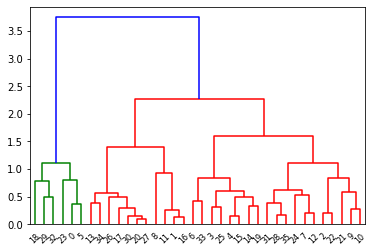

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df.drop('State_UT',axis=1),method='ward'))

From the dendrogram we saw that the ideal number of clusters for the dataset is 2, the kmeans algorithm also found the same. We will again use Silhoutte Score, Calinski Harabarz Index and Davis Bouldin Score to validate this.

In [ ]:
list1=['single','complete','average','ward']

In [ ]:
from sklearn.cluster import AgglomerativeClustering
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for j in list1:
  for i in (2,3,4,5):
    agg_m=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
    mod_k=agg_m.fit(df.drop('State_UT',axis=1))
    #pred_k=mod_k.predict(df.drop('State_UT',axis=1))
    kmean_sil=silhouette_score(df.drop('State_UT',axis=1),agg_m.labels_,metric='euclidean')
    kmean_cal=calinski_harabasz_score(df.drop('State_UT',axis=1),agg_m.labels_)
    kmean_dav=davies_bouldin_score(df.drop('State_UT',axis=1),agg_m.labels_)
    print(i,j)
    print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
    print('---------')
    print('\n')
    l1.append(i)
    l2.append(j)
    l3.append(kmean_sil)
    l4.append(kmean_cal)
    l5.append(kmean_dav)

2 single
2 	 Silhouette Score: 0.20935040549281558 ,Calinski Harbasz Score:  1.9053676350081443 ,Davies Bouldin Score:  0.6419306752788748
---------


3 single
3 	 Silhouette Score: 0.16274986189551388 ,Calinski Harbasz Score:  4.293015682478415 ,Davies Bouldin Score:  0.52859158574078
---------


4 single
4 	 Silhouette Score: 0.22139668147448793 ,Calinski Harbasz Score:  6.8057027193728326 ,Davies Bouldin Score:  0.5045172230371229
---------


5 single
5 	 Silhouette Score: 0.2307965947728134 ,Calinski Harbasz Score:  7.7963361401466695 ,Davies Bouldin Score:  0.6021675969107608
---------


2 complete
2 	 Silhouette Score: 0.38403267978142674 ,Calinski Harbasz Score:  22.374719523276134 ,Davies Bouldin Score:  1.0044235618268589
---------


3 complete
3 	 Silhouette Score: 0.27208705516733694 ,Calinski Harbasz Score:  14.887961782428992 ,Davies Bouldin Score:  1.0807058066188384
---------


4 complete
4 	 Silhouette Score: 0.26380572856155265 ,Calinski Harbasz Score:  19.320093129453

In [ ]:
pd.DataFrame({'Cluster':l1,'Linkage':l2,'Silhoutte Score':l3,'Calinski Harabasz Index':l4,'Davies Bouldin Score':l5})

,Cluster,Linkage,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,2,single,0.209350,1.905368,0.641931
1,3,single,0.162750,4.293016,0.528592
2,4,single,0.221397,6.805703,0.504517
3,5,single,0.230797,7.796336,0.602168
4,2,complete,0.384033,22.374720,1.004424
5,3,complete,0.272087,14.887962,1.080706
6,4,complete,0.263806,19.320093,1.125213
7,5,complete,0.270576,17.493914,0.942205
8,2,average,0.448488,24.868991,0.819660
9,3,average,0.319475,14.668642,0.718223


As observed from the output, ideal number of clusters is indeed 2 with linkage methods '**average**' or '**ward**'.

In [ ]:
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for j in list1:
 for i in (2,3,4,5):
  agm=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
  mod_k=agm.fit(dfc.drop('State_UT',axis=1))
  #pred_k=mod_k.predict(df.drop('State_UT',axis=1))
  kmean_sil=silhouette_score(dfc.drop('State_UT',axis=1),agm.labels_,metric='euclidean')
  kmean_cal=calinski_harabasz_score(dfc.drop('State_UT',axis=1),agm.labels_)
  kmean_dav=davies_bouldin_score(dfc.drop('State_UT',axis=1),agm.labels_)
  print(i,j)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  print('---------')
  print('\n')
  l1.append(i)
  l2.append(j)
  l3.append(kmean_sil)
  l4.append(kmean_cal)
  l5.append(kmean_dav)

2 single
2 	 Silhouette Score: 0.43893203183343654 ,Calinski Harbasz Score:  6.213533741431188 ,Davies Bouldin Score:  0.3630591468457711
---------


3 single
3 	 Silhouette Score: 0.3587674461439186 ,Calinski Harbasz Score:  7.606582209338366 ,Davies Bouldin Score:  0.5131789098253615
---------


4 single
4 	 Silhouette Score: 0.15500255278655695 ,Calinski Harbasz Score:  5.688970567149966 ,Davies Bouldin Score:  0.5953105971535857
---------


5 single
5 	 Silhouette Score: 0.14354054564261026 ,Calinski Harbasz Score:  5.548882884058058 ,Davies Bouldin Score:  0.5467555030448845
---------


2 complete
2 	 Silhouette Score: 0.43125840551810285 ,Calinski Harbasz Score:  20.671098960048344 ,Davies Bouldin Score:  0.7866202263770135
---------


3 complete
3 	 Silhouette Score: 0.3347410840627271 ,Calinski Harbasz Score:  24.384749042622854 ,Davies Bouldin Score:  0.8524536367527181
---------


4 complete
4 	 Silhouette Score: 0.3025548575379217 ,Calinski Harbasz Score:  26.38570861665957 

In [ ]:
pd.DataFrame({'Cluster':l1,'Linkage':l2,'Silhoutte Score':l3,'Calinski Harabasz Index':l4,'Davies Bouldin Score':l5})

,Cluster,Linkage,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,2,single,0.438932,6.213534,0.363059
1,3,single,0.358767,7.606582,0.513179
2,4,single,0.155003,5.688971,0.595311
3,5,single,0.143541,5.548883,0.546756
4,2,complete,0.431258,20.671099,0.786620
5,3,complete,0.334741,24.384749,0.852454
6,4,complete,0.302555,26.385709,1.010558
7,5,complete,0.248225,23.080327,1.148964
8,2,average,0.414017,20.959452,0.877199
9,3,average,0.331067,11.844868,0.771804


In case of unnormalized dataset, 2 clusters with complete linkage is the best. But in case of normalized dataset, the performance is better. There the Silhoutte Score and Calinski Harabarz Score performance is better though the Davies Bouldin score pervermance is a bit lower.

Cluster 2 for both algorithms KMeans and Agglomerative have same performance. Let's see the how the values for each feature vary across the two clusters.

In [ ]:
kmeansf=KMeans(n_clusters=2,random_state=31)
kmeansf.fit(df.drop(['State_UT'],axis=1))
pred_kk=kmeansf.predict(df.drop(['State_UT'],axis=1))
df['pred_k2']=pred_kk

In [ ]:
df.head()

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,pred_k2
0,A & N Islands,0.230010,0.404943,0.387047,0.295219,0.257102,0.216763,0.206779,1
1,Andhra Pradesh,0.401083,0.226258,0.500472,0.923247,0.952994,0.996763,0.998670,0
2,Arunachal Pradesh,0.619885,0.804452,0.390787,0.442575,0.678186,0.756671,0.777405,0
3,Assam,0.733952,0.301526,0.264339,0.343321,0.837857,0.613463,0.691578,0
4,Bihar,0.403778,0.383082,0.075522,0.149815,0.944448,0.832581,0.854044,0


In [ ]:
df1=pd.melt(frame=df.drop('State_UT',axis=1),id_vars='pred_k2',var_name='parameters',value_name='values')
df1.head()

,pred_k2,parameters,values
0,1,mean_dropout,0.230010
1,0,mean_dropout,0.401083
2,0,mean_dropout,0.619885
3,0,mean_dropout,0.733952
4,0,mean_dropout,0.403778


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


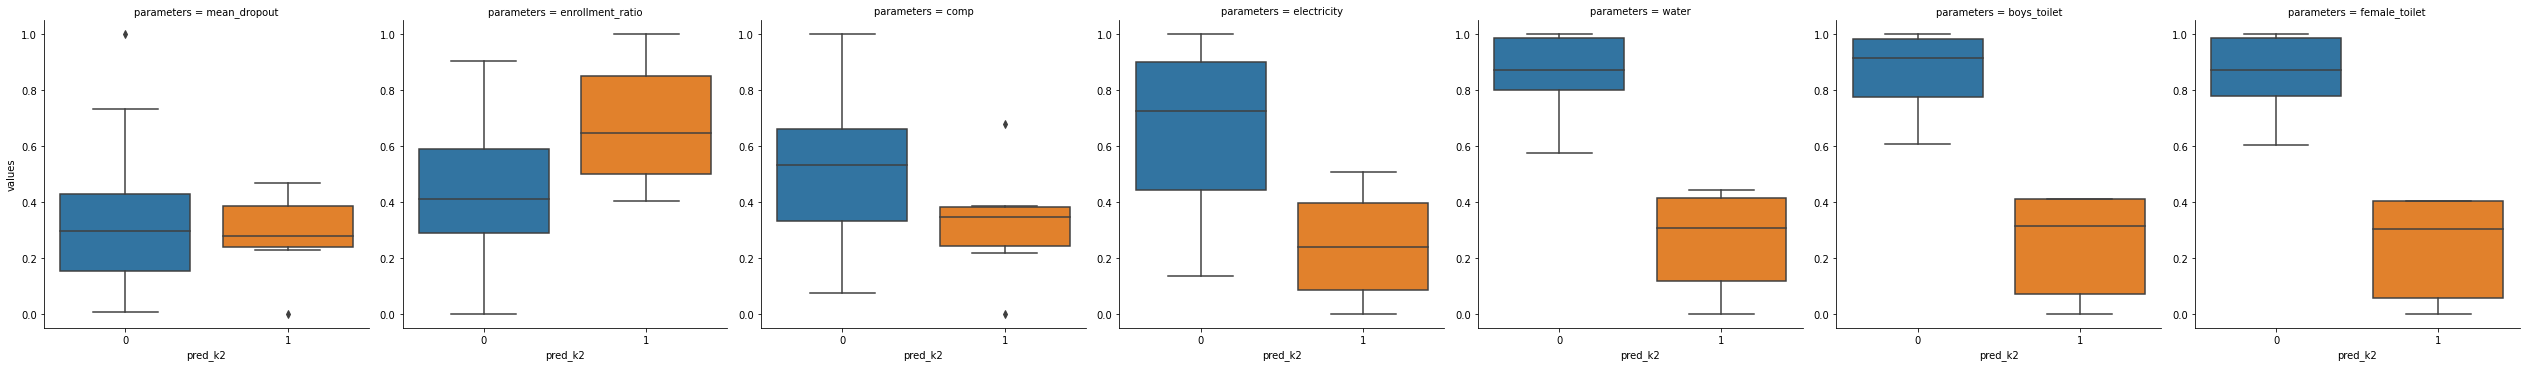

In [ ]:
import seaborn as sns 
sns.factorplot(data=df1,y='values',x='pred_k2',col='parameters',kind='box',sharey=False)

In [ ]:
agg_mod_=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
agg_mod_.fit(df.drop('State_UT',axis=1))
df['agg_clust2']=agg_mod_.labels_

In [ ]:
df2=pd.melt(frame=df.drop(['State_UT','pred_k2'],axis=1),id_vars='agg_clust2',var_name='parameters',value_name='values')
df2.head()

,agg_clust2,parameters,values
0,1,mean_dropout,0.230010
1,0,mean_dropout,0.401083
2,0,mean_dropout,0.619885
3,0,mean_dropout,0.733952
4,0,mean_dropout,0.403778


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


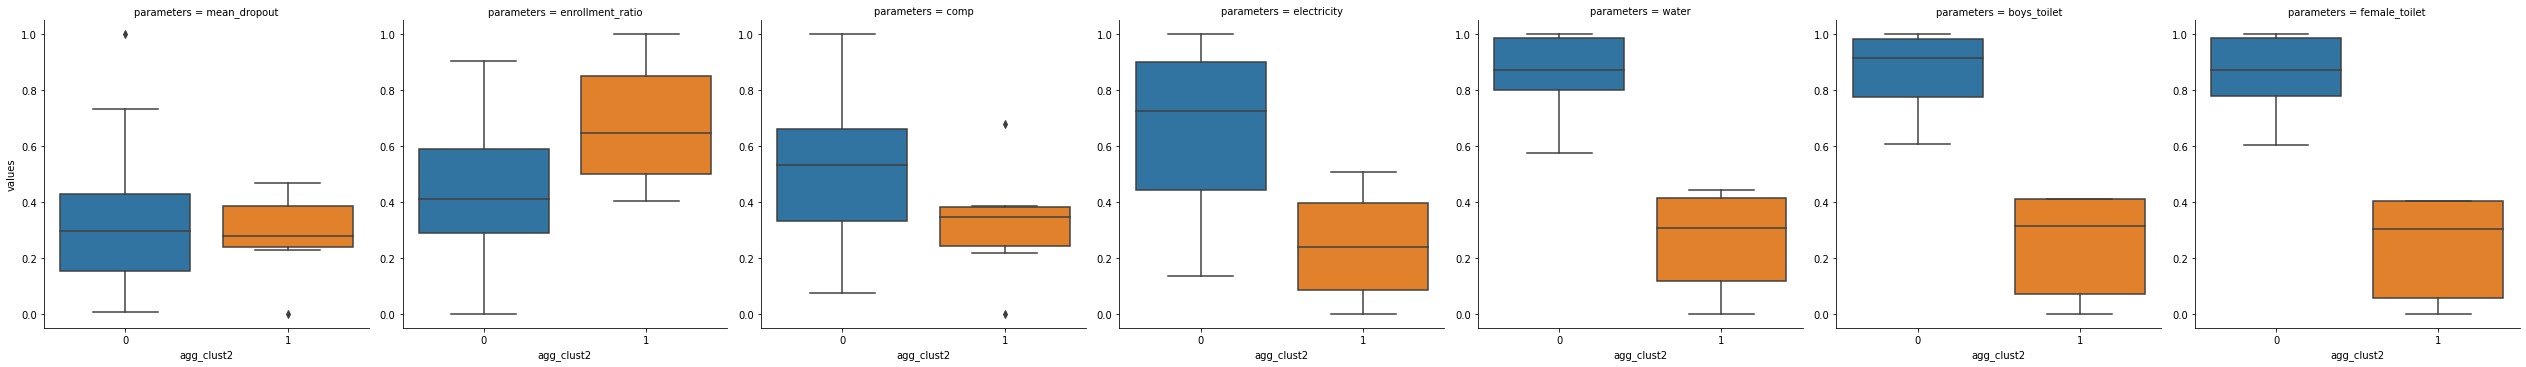

In [ ]:
sns.factorplot(data=df2,y='values',x='agg_clust2',col='parameters',kind='box',sharey=False)

We see that both the KMeans and Agglomerative Clustering have the value range of each of the feature/category exactly the same.

Based on careful observations of the boxplots we can conclude that category has higher values of for comp, electricity, water and the toilets features. So we can says the states falling in category 0 has much better infrastructure than schools of category 1. On the otherhand, the dropout rate is almost same for both groups with 0 has higher variablity. While the enrollment ratio is good for group 1. 

So we can call group 0 as Higher Infrastructure, Lesser Enrollment-Ratio and and group 1 as Less-Infrastructure, Better Enrollment-Ratio.

In [ ]:
# Checking which states fall in cluster 1 i.e, Less-Infrastructure, Better Enrollment-Ratio cluster
df[df['pred_k2']==1]

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,pred_k2,agg_clust2
0,A & N Islands,0.230010,0.404943,0.387047,0.295219,0.257102,0.216763,0.206779,1,1
5,Chandigarh,0.286530,0.485608,0.365920,0.180697,0.071308,0.020562,0.008335,1,1
18,Lakshadweep,0.000000,0.546466,0.680488,0.508700,0.442896,0.412965,0.405223,1,1
23,Mizoram,0.469673,0.885717,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
29,Sikkim,0.274682,1.000000,0.329338,0.429930,0.434573,0.411807,0.403993,1,1
32,Tripura,0.420818,0.744776,0.216598,0.055367,0.357821,0.409610,0.404409,1,1


In [ ]:
# Renaming the clusters as discussed before
df['pred_k2_label']=df.pred_k2.map({0:'Higher Infrastructure, Lesser Enrollment-Ratio',1:'Less-Infrastructure, Better Enrollment-Ratio'})

In [ ]:
!pip install geopandas

Note keep **Indian_States.prj.txt** , **Indian_States.shx**,
**Indian_States.dbf** , **Indian_States.shp** in same folder.

In [ ]:
# Importing the shape file for Indian states. It is a vector map representation where places are represented as collection of discrete objects using points, lines & polygons.
# Geopandas is similar to Pandas but contains geographical locations
import geopandas
map=geopandas.read_file('Indian_States.shp')
map.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [ ]:
# Replacing name of our original states with name as given in geopandas table to merge both of them
replace={'A & N Islands':'Andaman & Nicobar Island','Arunachal Pradesh':'Arunanchal Pradesh','Dadra & Nagar Haveli':'Dadara & Nagar Havelli', 'Delhi':'NCT of Delhi'}
df = df.replace({"State_UT": replace})  

In [ ]:
# Merging original table with geopandas table
mer_g=pd.merge(df,map,left_on='State_UT',right_on='st_nm',how='inner')
mer_g.head()

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,pred_k2,agg_clust2,pred_k2_label,st_nm,geometry
0,Andaman & Nicobar Island,0.230010,0.404943,0.387047,0.295219,0.257102,0.216763,0.206779,1,1,"Less-Infrastructure, Better Enrollment-Ratio",Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andhra Pradesh,0.401083,0.226258,0.500472,0.923247,0.952994,0.996763,0.998670,0,0,"Higher Infrastructure, Lesser Enrollment-Ratio",Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
2,Arunanchal Pradesh,0.619885,0.804452,0.390787,0.442575,0.678186,0.756671,0.777405,0,0,"Higher Infrastructure, Lesser Enrollment-Ratio",Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
3,Assam,0.733952,0.301526,0.264339,0.343321,0.837857,0.613463,0.691578,0,0,"Higher Infrastructure, Lesser Enrollment-Ratio",Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
4,Bihar,0.403778,0.383082,0.075522,0.149815,0.944448,0.832581,0.854044,0,0,"Higher Infrastructure, Lesser Enrollment-Ratio",Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."


In [ ]:
# converting the coordinate reference system to epsg 4326. It containes the geometry of states in terms of their latitude
# and longitude
from geopandas import GeoDataFrame
merg= GeoDataFrame(mer_g,crs={'init': 'epsg:4326'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
!pip install pandas_bokeh

In [ ]:
merg.head()

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,pred_k2,agg_clust2,pred_k2_label,st_nm,geometry
0,Andaman & Nicobar Island,0.230010,0.404943,0.387047,0.295219,0.257102,0.216763,0.206779,1,1,"Less-Infrastructure, Better Enrollment-Ratio",Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andhra Pradesh,0.401083,0.226258,0.500472,0.923247,0.952994,0.996763,0.998670,0,0,"Higher Infrastructure, Lesser Enrollment-Ratio",Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
2,Arunanchal Pradesh,0.619885,0.804452,0.390787,0.442575,0.678186,0.756671,0.777405,0,0,"Higher Infrastructure, Lesser Enrollment-Ratio",Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
3,Assam,0.733952,0.301526,0.264339,0.343321,0.837857,0.613463,0.691578,0,0,"Higher Infrastructure, Lesser Enrollment-Ratio",Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
4,Bihar,0.403778,0.383082,0.075522,0.149815,0.944448,0.832581,0.854044,0,0,"Higher Infrastructure, Lesser Enrollment-Ratio",Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."


In [ ]:
# plotting the clusters in map and coloring states based on the cluster they fall
import pandas_bokeh
pandas_bokeh.output_notebook()
merg.plot_bokeh(
    figsize=(900, 600),
    simplify_shapes=5000,
    category="pred_k2",
    show_colorbar=False,
    colormap=["yellow", "green"],
    hovertool_columns=["State_UT", "pred_k2_label"])

Figure(id='1384', ...)

Only 6 districts got classified in one cluster and rest 30 in others. We need more finer categorization or grouping for more ease of analysis of schools across groups. So we will increase the number of cluster to 3. Though according to clustering algorithm, 2 is the most valid choice of the number of clusters, we can really modify the results for the sake of our end goal if needed.

In [ ]:
agg_mod_=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agg_mod_.fit(dfc.drop('State_UT',axis=1))
dfc['agg_clust']=agg_mod_.labels_

In [ ]:
dfc.head(4)

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,agg_clust
0,A & N Islands,7.191667,83.746667,50.113636,60.893636,63.636364,63.636364,63.636364,2
1,Andhra Pradesh,9.850000,75.552500,58.854545,95.706364,97.686364,99.777273,99.913636,1
2,Arunachal Pradesh,13.250000,102.067500,50.401818,69.061818,84.240000,88.652727,89.777273,0
3,Assam,15.022500,79.004167,40.657273,63.560000,92.052727,82.017273,85.845455,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


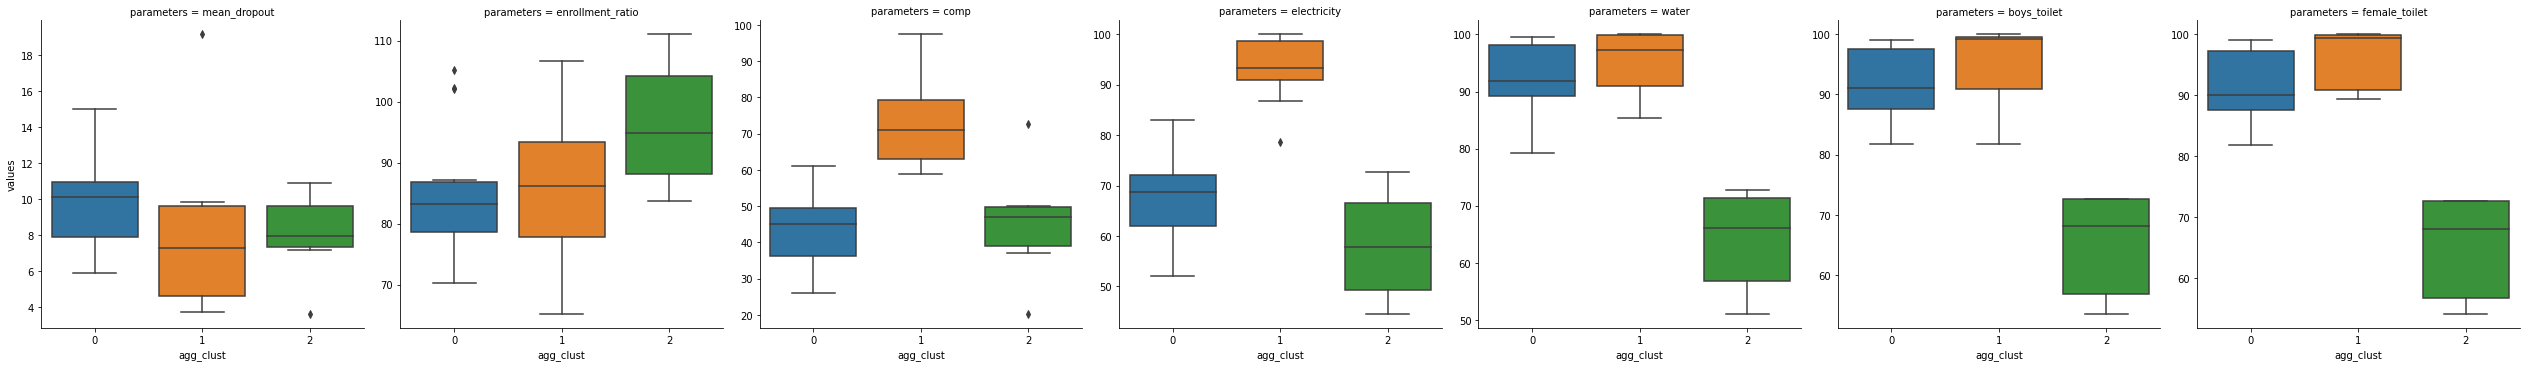

In [ ]:
df3=pd.melt(frame=dfc.drop(['State_UT'],axis=1),id_vars='agg_clust',var_name='parameters',value_name='values')
sns.factorplot(data=df3,y='values',x='agg_clust',col='parameters',kind='box',sharey=False)

If we see the boxplots carefully we will find that in terms of infrastructure comp(computer), electricity, water and toilets have highest range for cluster 1(though the difference is not much great for water and the toilets),so it's the best cluster in terms of infrastructure. Then comes cluster 0 and lastly cluster 2 has the poorest range of values for infrastructure. Enrollment ratio is highest in case of cluster 2 , cluster 0 and 1 have almost similar enrollment ratio with cluster 1 has higher variability in it's high range of values. In terms of dropout ratio cluster 0 has higher range of values than others.

Thus we name the clusters as:

0: Good Infrastucture,less enrollment ratio, high dropout

1: Best infrastructure, Good enrollment ratio, low dropout

2: Inadequate Infrastructure, Best Infrastructure Ratio, medium dropout

Note: **Best > Good**                           

 **High > Medium > Low**

In [ ]:
kmeansy=KMeans(n_clusters=3,random_state=31)
kmeansy.fit(dfc.drop(['State_UT','agg_clust'],axis=1))
pred_k=kmeansy.predict(dfc.drop(['State_UT','agg_clust'],axis=1))
dfc['pred_k3']=pred_k

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


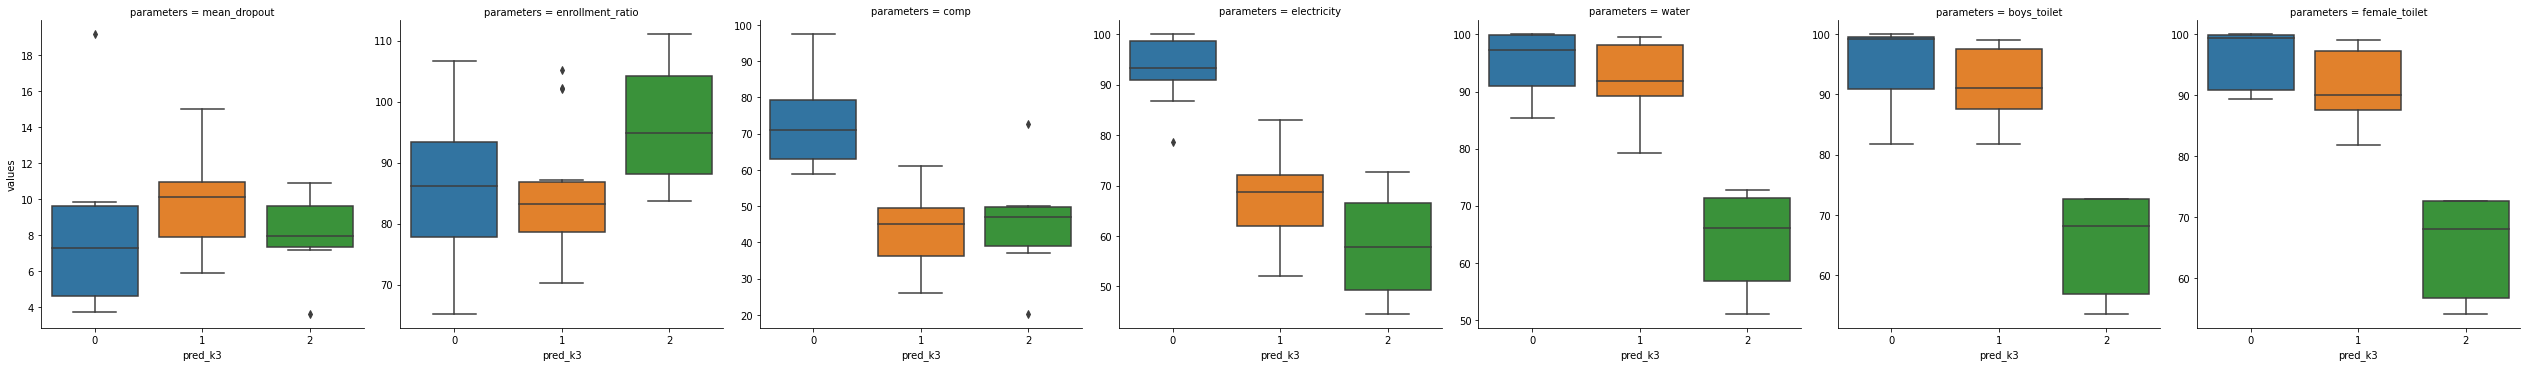

In [ ]:
df4=pd.melt(frame=dfc.drop(['State_UT','agg_clust'],axis=1),id_vars='pred_k3',var_name='parameters',value_name='values')
sns.factorplot(data=df4,y='values',x='pred_k3',col='parameters',kind='box',sharey=False)

If checked carefully, we will find that the results are very similar to Agglomerative Clustering only Cluster 0 in former is represented as cluster 1 in latter.

In [ ]:
dfc = dfc.replace({"State_UT": replace}) 

In [ ]:
dfc['Clust_Label']=dfc.agg_clust.map({0:'Good Infrastucture,less enrollment ratio, high dropout',1:'Best infrastructure, Good enrollment ratio, low dropout',2:'Inadequate Infrastructure, Best Infrastructure Ratio, medium dropout'})

In [ ]:
merg['agg_clust']=dfc['agg_clust']
merg['Clust_Label']=dfc['Clust_Label']

In [ ]:
merg.agg_clust.value_counts()

1    16
0    14
2     6
Name: agg_clust, dtype: int64

We can see that in cluster 0 there are 16 states, 14 states in cluster 1 and 6 states in cluster 2. 

Basically cluster 0 in 2-clustered which had 30 states is divided into cluster-0 & 1 in the ratio 16:14 .

In [ ]:
merg.plot_bokeh(
    figsize=(900, 600),
    simplify_shapes=5000,
    category="agg_clust",
    show_colorbar=False,
    colormap=["yellow", "green",'red'],
    hovertool_columns=["State_UT","Clust_Label"])

Figure(id='1509', ...)

So as we can see the states are coloured according the the clusters they fall into.

Thus we successfully grouped Indian states into various clusters. This will help the Education Department to plan improvement schemes for each cluster specifically which will result in greater progress in the field of education in India.